# Multi-Agent Homework

---


In [45]:
%%capture --no-stderr
%pip install langchain langchain_openai langsmith pandas langchain_experimental matplotlib langgraph langchain_core

## Test Model 
- OpenAI gpt-4o-mini
- MiniMax 
- Kimi
- ChatGLM 4 Flash


In [2]:
# Test Kimi API
from langchain_openai import ChatOpenAI
import os

kimiModel="moonshot-v1-32k"
# kimiModel="moonshot-v1-32k"
# kimiModel="moonshot-v1-128k"
kimi_chat = ChatOpenAI(model=kimiModel, api_key=os.environ["KIMI_API_KEY"], base_url="https://api.moonshot.cn/v1")
kimi_chat.invoke("你可以做什么，做过自我介绍吧").content

'你好！我是Kimi，由一群充满热情的人工智能专家创建的智能助手。我擅长中文和英文的对话，并且可以帮助你获取信息、解答疑问、阅读文件和网页内容。如果你有任何问题或需要帮助，随时可以告诉我，我会尽力为你提供支持。现在，有什么可以帮你的吗？'

In [3]:
# Test ChatGLM API
from langchain_openai import ChatOpenAI
import os

glmModel="glm-4-flash"
chatglm_chat = ChatOpenAI(model=glmModel, api_key=os.environ["CHATGLM-API-KEY"], base_url="https://open.bigmodel.cn/api/paas/v4")
chatglm_chat.invoke("你可以做什么，做过自我介绍吧").content

'当然可以。\n\n您好，我是一个人工智能助手，名为 ChatGLM。我是基于清华大学 KEG 实验室和智谱 AI 公司于 2024 年共同训练的语言模型 GLM-4 开发的。我的任务是针对用户的问题和要求提供适当的答复和支持。\n\n以下是我能做的事情：\n\n1. **回答问题**：我可以回答各种领域的问题，包括科学、技术、历史、文化、生活常识等。\n2. **辅助创作**：我可以帮助用户创作文章、诗歌、故事等。\n3. **语言翻译**：我支持多种语言的翻译。\n4. **学习辅导**：我可以提供一些学习资源和辅导，帮助用户提高学习效率。\n5. **生活建议**：我可以根据用户的需求提供一些建议和帮助。\n\n我的目标是成为一个可靠、有用的人工智能助手，为用户提供帮助。如果您有任何问题或需要帮助，随时可以问我。'

In [4]:
#Test miniMax API
from langchain_openai import ChatOpenAI
import os

miniMaxModel='abab6.5s-chat'

miniMax_chat = ChatOpenAI(model=miniMaxModel, api_key=os.environ["MINIMAX_API_KEY"], base_url="https://api.minimax.chat/v1")
miniMax_chat.invoke("你是谁")

AIMessage(content='我是MM智能助理，一个由MiniMax公司自研的大型语言模型。我可以帮助回答问题、提供信息、解决问题和进行对话等。如果你有任何问题或需要帮助，请随时告诉我！', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': None, 'prompt_tokens': None, 'total_tokens': 108, 'total_characters': 0}, 'model_name': 'abab6.5s-chat', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, name='MM智能助理', id='run-524e0e49-e60e-4d9f-a261-34d63db2f188-0', usage_metadata={'input_tokens': None, 'output_tokens': None, 'total_tokens': 108})

In [5]:
#Test Open API gpt-4o-mini
from langchain_openai import ChatOpenAI
import os

openai_chat = ChatOpenAI(model='gpt-4o-mini')
openai_chat.invoke("Please introduce yourself in English and more detail about you and your company.")

AIMessage(content='Hello! I am an AI language model created by OpenAI, known as ChatGPT. My primary function is to assist users by providing information, answering questions, and engaging in conversations on a wide range of topics. I am designed to understand and generate human-like text, making it easier for users to interact with me.\n\nAs for my "company," I am part of OpenAI, an artificial intelligence research organization that aims to ensure that artificial general intelligence (AGI) benefits all of humanity. OpenAI conducts research in various areas of AI, focusing on safety, ethics, and practical applications. The organization is committed to promoting and developing friendly AI while addressing the challenges and implications that come with advanced AI technologies.\n\nIf you have specific questions or topics you\'d like to discuss, feel free to ask!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 159, 'prompt_tokens': 21, 'total_

## setup test dataset using LangSmith


In [7]:
from langsmith import Client

client = Client()

# Define dataset: these are your test cases
dataset_name = "QA homework Dataset"
try:
    dataset = client.create_dataset(dataset_name)
    client.create_examples(
        inputs=[
            {"question": "What is LangChain?"},
            {"question": "What is LangSmith?"},
            {"question": "What is OpenAI?"},
            {"question": "What is Google?"},
            {"question": "What is Mistral?"},
        ],
        outputs=[
            {"answer": "LangChain is a framework for developing applications powered by language models."},
            {"answer": "LangSmith is a platform that helps developers build, test, and manage language model applications."},
            {"answer": "OpenAI is an artificial intelligence research organization known for its development of AI models, including GPT."},
            {"answer": "Google is a multinational technology company specializing in Internet-related services and products."},
            {"answer": "Mistral is an AI startup focused on developing advanced open-weight language models."}
        ],
        dataset_id=dataset.id,
    )
except:
    dataset = client.list_datasets(dataset_name="My Test Dataset 1")

In [8]:
dataset = client.list_datasets(dataset_name=dataset_name)

In [8]:
dataset

<generator object Client.list_datasets at 0x000001F86C0407C0>

In [9]:
# test model with dataset in LangSmit

from langchain_core.prompts.prompt import PromptTemplate
from langsmith.evaluation import LangChainStringEvaluator
from langchain_openai import ChatOpenAI

evaluate_llm = ChatOpenAI(model="gpt-4o")

_PROMPT_TEMPLATE = """You are an expert professor specialized in grading students' answers to questions.
You are grading the following question:
{query}
Here is the real answer:
{answer}
You are grading the following predicted answer:
{result}
Respond with CORRECT or INCORRECT:
Grade:
"""

PROMPT = PromptTemplate(
    input_variables=["query", "answer", "result"], template=_PROMPT_TEMPLATE
)

qa_evaluator = LangChainStringEvaluator("qa", config={"llm": evaluate_llm, "prompt": PROMPT})


In [10]:
qa_evaluator

In [10]:
# define evaluate_length method

from langsmith.schemas import Run, Example

def evaluate_length(run: Run, example: Example) -> dict:
    prediction = run.outputs.get("output") or ""
    required = example.outputs.get("answer") or ""
    score = int(len(prediction) < 2 * len(required))
    return {"key":"length", "score": score}
    

In [12]:
# run evaluate
from langchain_core.prompts import ChatPromptTemplate

def my_app(question):
    # return miniMax_chat.invoke(question).content
    prompt = ChatPromptTemplate.from_messages(
        [ 
            ("system","Respond to the users question in a short, concise manner (one short sentence)."),
            ("user","{question}")
        ]
    )
    chat = prompt | openai_chat
    return chat.invoke({"question":question}).content
    


# my_app('who are you?')


In [13]:
def langsmith_app(inputs):
    output = my_app(inputs["question"])
    return {"output": output}
    

In [14]:
from langsmith.evaluation import evaluate

experiment_results = evaluate(
    langsmith_app, # Your AI system
    data=dataset_name, # The data to predict and grade over
    evaluators=[evaluate_length, qa_evaluator], # The evaluators to score the results
    experiment_prefix="GPT-4o-Mini-2", # A prefix for your experiment names to easily identify them
)

View the evaluation results for experiment: 'GPT-4o-Mini-2-2df54fcb' at:
https://smith.langchain.com/o/986a6d93-fbb4-5bfd-bbb4-29e09bf31f1c/datasets/90c9520a-5491-432c-bb67-be4ce853b7e0/compare?selectedSessions=0a0271ac-a12e-4706-b929-5ca9db14c6d5




0it [00:00, ?it/s]

In [16]:
experiment_results


<ExperimentResults GPT-4o-Mini-2-2df54fcb>

In [18]:
for i, result in enumerate(experiment_results):  # doctest: +ELLIPSIS
        pass

In [19]:
import langsmith
import pandas 

experiment_results.experiment_name


'GPT-4o-Mini-2-2df54fcb'

In [20]:

experiment_name = experiment_results.experiment_name
re = client.get_test_results(project_name=experiment_name)

score = re['feedback.correctness'].sum()
print(f'score:{score}',"\n\n")
re

C:\Users\simso\AppData\Local\Temp\ipykernel_14376\3888799184.py:2: UserWarning: Function get_test_results is in beta.
  re = client.get_test_results(project_name=experiment_name)


score:4.0 




,reference.answer,outputs.output,execution_time,error,id,feedback.correctness,feedback.length,input.inputs.question
0,A company that creates Large Language Models,Mistral is an open-source large language model...,43.136775,None,b1b4ff81-69d6-4d1c-a0e0-49efefc0b7d9,1.0,0.0,What is Mistral?
1,A platform for observing and evaluating LLM ap...,LangSmith is a tool designed for building and ...,1.251573,None,05edf89b-2698-41fa-916e-5a69019a8307,0.0,1.0,What is LangSmith?
2,A framework for building LLM applications,LangChain is a framework for developing applic...,1.175065,None,a618e89d-9966-4358-94db-3565d5b05384,1.0,1.0,What is LangChain?
3,A company that creates Large Language Models,OpenAI is an artificial intelligence research ...,22.120883,None,364b59fc-4a16-418e-a11b-d4c3690cd306,1.0,0.0,What is OpenAI?
4,A technology company known for search,Google is a multinational technology company s...,1.182803,None,2326b001-9fff-4856-93fb-d8b64002999d,1.0,0.0,What is Google?


## Thoughts

- create 3 different LLM ( gpt-4o-mini, minimax, ChatGLM-4-Flash) Chat instance
- create Dataset on LangSmith (already done)
- create evaluate function
- create 3 different evaluate app for 3 different Chat instance 
- create 3 method as Agent Node to run 3 Chat instance for Same dataset in LangSmith and get results
- send results to final Agent to come up a final score table for 3 Chat instance
- display table in notebook cell.



In [65]:
import asyncio
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langsmith.evaluation import LangChainStringEvaluator
from langchain_core.output_parsers import StrOutputParser
import time

# Step 1: 创建LLM实例  ["GPT-4o-mini", "Minimax", "ChatGLM"]
class LLMInstance:
    def __init__(self, model_name):
        # 使用 ChatOpenAI 初始化模型
        self.model_name = model_name
        #self.model = ChatOpenAI(model_name=model_name)
        if model_name=="GPT-4o-mini":
            self.model = openai_chat
        elif model_name=="Minimax":
            self.model = miniMax_chat
        else:
            self.model = chatglm_chat

    async def infer(self, question):
        # 定义聊天提示模板
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "Respond to the user's question in a short, concise manner (one short sentence). ONLY reply based on your database and no other thoughts."),
                ("user", "{question}")
            ]
        )
        
        # 组合提示和模型
        chat = prompt | self.model
        # 调用模型进行推理
        response = await chat.ainvoke({"question": question})
        return response.content  # 获取返回内容

# 步骤 3：创建评估函数
evaluate_llm = ChatOpenAI(model="gpt-4o-mini")

_PROMPT_TEMPLATE = """You are an expert professor specialized in grading students' answers to questions.
You should consider the Major meaning and concept in both [answer] and [result], if they're talking same thing.
Consider the object of both [answer] and [result] if they're same.
[Example]
  answer: Google is a company.
  result: Microsoft is a company. 
  Then [answer] and [result] is talking different object, so that [result] is INCORRECT.
  
You are grading the following question:
{query}
Here is the real answer:
{answer}
You are grading the following predicted answer:
{result}
Respond with `CORRECT` or `INCORRECT` ONLY, No other words and comments on the [result]. 
Grade:
"""

PROMPT = PromptTemplate(
    input_variables=["query", "answer", "result"], template=_PROMPT_TEMPLATE
)

## Create evaluator Only Once
evaluator = PROMPT | evaluate_llm | StrOutputParser()

async def evaluate_response(query, expected_answer, generated_answer):
    # 使用 LangChainStringEvaluator 进行答案评估
    
    evaluation_result = await evaluator.ainvoke({"query": query, "answer": expected_answer, "result": generated_answer})
    return 1 if evaluation_result.strip().upper()=="CORRECT"  else 0

# Step 4: 评估应用
async def evaluate_model(model, questions, expected_answers):
    scores = []
    for i in range(len(questions)):
        answer = await model.infer(questions[i])
        score = await evaluate_response(questions[i], expected_answers[i], answer)
        scores.append(score)
    return scores

gpt_model = LLMInstance("GPT-4o-mini")
minimax_model = LLMInstance("Minimax")
chatglm_model = LLMInstance("ChatGLM")

# Step 5: 创建代理节点
async def run_evaluations(questions, expected_answers):
    # gpt_scores = await evaluate_model(gpt_model, questions, expected_answers)
    minimax_scores = await evaluate_model(minimax_model, questions, expected_answers)
    chatglm_scores = await evaluate_model(chatglm_model, questions, expected_answers)
    return minimax_scores, chatglm_scores

# Step 6: 汇总结果到最终Agent
async def summarize_results():
    questions = [
        "What is LangChain?",
        "What is LangSmith?",
        "What is OpenAI?",
        "What is Google?",
        "What is Mistral?"
    ]
    
    expected_answers = [
        "LangChain is a framework for developing applications powered by language models.",
        "LangSmith is a platform that helps developers build, test, and manage language model applications.",
        "OpenAI is an artificial intelligence research organization known for its development of AI models, including GPT.",
        "Google is a multinational technology company specializing in Internet-related services and products.",
        "Mistral is an AI startup focused on developing advanced open-weight language models."
    ]

    
    minimax_scores, chatglm_scores = await run_evaluations(questions, expected_answers)
    print(minimax_scores,"\n\n", "\n\n",chatglm_scores , "=================")
    results = {
        "Model": ["Minimax", "ChatGLM"],
        "Scores": [sum(minimax_scores),  sum(chatglm_scores)]
    }

    results_df = pd.DataFrame(results)
    return results_df

# Step 7: 在Notebook中显示结果
async def main():
    results_df = await summarize_results()
    print(results_df)

# 运行主程序
await main()


[1, 1, 1, 1, 0] 

 

 [1, 0, 1, 1, 0] =================
     Model  Scores
0  Minimax       4
1  ChatGLM       3



## Homework 

---


### create LLMInstance class for inference

In [49]:

from langchain_core.messages import BaseMessage, HumanMessage, ToolMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph, START
from langchain_openai import ChatOpenAI

class LLMInstance:
    def __init__(self, model_name):
        # 使用 ChatOpenAI 初始化模型
        self.model_name = model_name
        #self.model = ChatOpenAI(model_name=model_name)
        if model_name=="GPT-4o-mini":
            self.model = openai_chat
        elif model_name=="Minimax":
            self.model = miniMax_chat
        else:
            self.model = chatglm_chat

    def infer(self, question):
        # 定义聊天提示模板
        prompt = ChatPromptTemplate.from_messages(
            [
                ("system", "Respond to the user's question in a short, concise manner (one short sentence). ONLY reply based on your database and no other thoughts."),
                ("user", "{question}")
            ]
        )
        
        # 组合提示和模型
        chat = prompt | self.model
        # 调用模型进行推理
        response = chat.invoke({"question": question})
        
        return response.content  # 获取返回内容

In [50]:
minimax_model = LLMInstance("Minimax")
chatglm_model = LLMInstance("ChatGLM")

### Create test data and expected result 

In [51]:

def question_pairs():
    questions = [
        "What is LangChain?",
        "What is LangSmith?",
        "What is OpenAI?",
        "What is Google?",
        "What is Mistral?"
    ]
    
    expected_answers = [
        "LangChain is a framework for developing applications powered by language models.",
        "LangSmith is a platform that helps developers build, test, and manage language model applications.",
        "OpenAI is an artificial intelligence research organization known for its development of AI models, including GPT.",
        "Google is a multinational technology company specializing in Internet-related services and products.",
        "Mistral is an AI startup focused on developing advanced open-weight language models."
    ]
    return {"questions": questions, "expected_answers": expected_answers}
    

In [11]:
question_pairs()

{'questions': ['What is LangChain?'],
 'expected_answers': ['LangChain is a framework for developing applications powered by language models.']}

### create Evaluator function 

In [61]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
import time 

evaluate_llm = ChatOpenAI(model="gpt-4o-mini")

_PROMPT_TEMPLATE = """You are an expert professor specialized in grading students' answers to questions.
You should consider the Major meaning and concept in both [answer] and [result], if they're talking same thing.
Consider the object of both [answer] and [result] if they're same.
[Example]
  answer: Google is a company.
  result: Microsoft is a company. 
  Then [answer] and [result] is talking different object, so that [result] is INCORRECT.
  
You are grading the following question:
{query}
Here is the real answer:
{answer}
You are grading the following predicted answer:
{result}
Respond with `CORRECT` or `INCORRECT` ONLY, No other words and comments on the [result]. 
Grade:
"""

PROMPT = PromptTemplate(
    input_variables=["query", "answer", "result"], template=_PROMPT_TEMPLATE
)

## Create evaluator Only Once
# evaluator = PROMPT | evaluate_llm | StrOutputParser()
evaluator = PROMPT | chatglm_chat | StrOutputParser()

def evaluate_response(query, expected_answer, generated_answer):
    # 进行答案评估  
    evaluation_result = evaluator.invoke({"query": query, "answer": expected_answer, "result": generated_answer})
    return 1 if evaluation_result.strip().upper()=="CORRECT"  else 0

# Step 4: 评估应用
def evaluate_model(model, questions, expected_answers):
    scores = []
    for i in range(len(questions)):
        answer = model.infer(questions[i])
        score = evaluate_response(questions[i], expected_answers[i], answer)
        scores.append(score)
        time.sleep(15)
    return scores

### Define graph state class 

In [53]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage, ToolMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langgraph.graph import END, StateGraph, START
import operator

def add_scores(left, right):
    for item in right:
        left.append(item)
    return left
    
class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    questions: list
    expected_answers: list
    sender_name: list
    scores: Annotated[list, add_scores]
    


### Create evaluate node as function for each model 


In [54]:

def evaluate_miniMax(state):
    q = state["questions"]
    an = state["expected_answers"]
    senders = state.get("sender_name",[])
    senders.append("MiniMax_LLM")
    scores = evaluate_model(minimax_model, q, an)
    return {"scores":[{"name":"minimax", "scores":scores}] , "sender_name": senders}
    

In [55]:
def eveluate_chatglm(state):
    q = state["questions"]
    an = state["expected_answers"]
    senders = state.get("sender_name",[])
    senders.append("ChatGLM-4-Flash")
    scores = evaluate_model(chatglm_model, q, an)
    return {"scores": [{"name": "ChatGLM", "scores": scores}] , "sender_name": senders}

### Roter node node | dummy entry node | Output node 

In [63]:
from typing import Literal
        
def router(state) -> Literal["minimax","chatglm", "__end__"]:
    q = state["questions"]
    an = state["expected_answers"]
    if len(q)==0 or len(an)==0 :
        return "__end__"
    senders = state.get("sender_name", [])
    if len(senders) == 0:
        return "minimax"
    elif len(senders) == 1:
        return "chatglm"
    else :
        return "__end__"

def entry(state):
    pass

summary_model = ChatOpenAI(model="gpt-4o-mini")
def output_agent(state):
    scores = state.get("scores", [])
    if len(scores) <= 1 : 
        return 
    print("total scores:", scores)
    query = ""
    for item in scores:
        model = item.get("name", "None")
        scorelist = item.get("scores", [])
        query += f'Model: {model}, total score:{sum(scorelist)}\n'
        
    result = kimi_chat.invoke(f"Based on below scores of models, summarize the model performance of them.\nYour should output the summary result and then put the result to a markdown table.\n\n[scores]\n{query}")
    return {"messages":[result]}
    

### Populate the StateGraph and draw flow chart 

In [64]:
graph_builder = StateGraph(State)
graph_builder.add_node("minimax_scoring", evaluate_miniMax)
graph_builder.add_node("chatglm_scoring", eveluate_chatglm)
graph_builder.add_node("entry", entry)
graph_builder.add_node("output", output_agent)
graph_builder.add_edge(START, "entry")
graph_builder.add_edge("minimax_scoring", "entry")
graph_builder.add_edge("chatglm_scoring", "entry")

graph_builder.add_conditional_edges(
    "entry",
    router,
    {"__end__":"output", "minimax":"minimax_scoring","chatglm":"chatglm_scoring"}
)

# 编译状态图并生成可执行图对象
graph = graph_builder.compile()

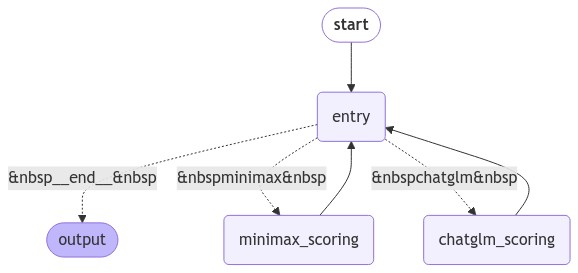

In [65]:
# 你可以使用 get_graph 方法来可视化图，并结合 draw 方法（如 draw_ascii 或 draw_png）
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    print(Exception)

### Run graph

In [67]:
for event in graph.stream(question_pairs()):
    if "entry" in event :
        continue
    else :
        print(event)
    
    output = event.get("output", {})
    messages = output.get("messages",[])
    print("final result:\n\n",messages[-1].content) if len(messages) >= 1 else None
    

{'minimax_scoring': {'sender_name': ['MiniMax_LLM'], 'scores': [{'name': 'minimax', 'scores': [0, 1, 1, 1, 0]}]}}
{'chatglm_scoring': {'sender_name': ['MiniMax_LLM', 'ChatGLM-4-Flash'], 'scores': [{'name': 'ChatGLM', 'scores': [1, 1, 0, 1, 0]}]}}
total scores: [{'name': 'minimax', 'scores': [0, 1, 1, 1, 0]}, {'name': 'ChatGLM', 'scores': [1, 1, 0, 1, 0]}]
{'output': {'messages': [AIMessage(content='Based on the provided scores, both models "minimax" and "ChatGLM" have a total score of 3.\n\nHere is the summary in a markdown table format:\n\n| Model     | Total Score |\n|-----------|-------------|\n| Minimax   | 3           |\n| ChatGLM   | 3           |', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 61, 'total_tokens': 129}, 'model_name': 'moonshot-v1-32k', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-6affd8d5-6c0e-4bab-bbcf-6f784fcdc243-0', usage_metadata={'input_tokens': 61, 'outpu